## Problem Statement 7: (Process the relevant data)
From the housing data(Data/housing.csv) read the following columns which may be relevant to the requirement.

District Name

Rural/Urban

Total Number of households

Total Number of Livable

Total Number of Dilapidated

Latrine_premise


In the given data The total number of households, Total Number of Livable, Total Number of Dilapidated, Latrine_premise, etc. seem to be in percentage terms and not in absolute terms.
The total number of households in a district can be found in the census data. Take the information from the census data and find the absolute values for the Total Number of Dilapidated, and Latrine_premise for both rural and urban areas of each district.

Calculate the data and rename the column names and save it in a CSV file named “housing.csv” in the “Clean_Data” folder, such that it  has the following column names:

District

Households_Rural

Households_Rural_Livable

Households_Rural_Dilapidated

Households_Rural_Toilet_Premise

Households_Urban

Households_Urban_Livable

Households_Urban_Dilapidated

Households_Urban_Toilet_Premise



Report if any district data is in one file but not the other.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df_census = pd.read_csv("C:/Users/raiti/OneDrive/Desktop/Projects/Python Project Healthcare/Python Project - Healthcare Census/Data/census_2011.csv")#, usecols = ["District name","Rural_Households","Urban_Households","Households"])
df_census.columns.values
#df_households[df_households['District name'] == "Kupwara"]['Households']>df_households[df_households['District name'] == "Kupwara"]['Rural_Households']

array(['District code', 'State name', 'District name', 'Population',
       'Male', 'Female', 'Literate', 'Male_Literate', 'Female_Literate',
       'SC', 'Male_SC', 'Female_SC', 'ST', 'Male_ST', 'Female_ST',
       'Workers', 'Male_Workers', 'Female_Workers', 'Main_Workers',
       'Marginal_Workers', 'Non_Workers', 'Cultivator_Workers',
       'Agricultural_Workers', 'Household_Workers', 'Other_Workers',
       'Hindus', 'Muslims', 'Christians', 'Sikhs', 'Buddhists', 'Jains',
       'Others_Religions', 'Religion_Not_Stated', 'LPG_or_PNG_Households',
       'Housholds_with_Electric_Lighting', 'Households_with_Internet',
       'Households_with_Computer', 'Rural_Households', 'Urban_Households',
       'Households', 'Below_Primary_Education', 'Primary_Education',
       'Middle_Education', 'Secondary_Education', 'Higher_Education',
       'Graduate_Education', 'Other_Education', 'Literate_Education',
       'Illiterate_Education', 'Total_Education', 'Age_Group_0_29',
       'Age_Group_3

In [3]:
df_households = pd.read_csv("C:/Users/raiti/OneDrive/Desktop/Projects/Python Project Healthcare/Python Project - Healthcare Census/Data/housing.csv",
                       usecols = ['State Name','District Name','Rural/Urban','Total Number of households','Total Number of Livable','Total Number of Dilapidated','Latrine_premise']
                      )
df_households

,State Name,District Name,Rural/Urban,Total Number of households,Total Number of Livable,Total Number of Dilapidated,Latrine_premise
0,JAMMU & KASHMIR,Kupwara,Rural,100,58.1,8.3,48.9
1,JAMMU & KASHMIR,Kupwara,Total,100,57.3,7.9,50.9
2,JAMMU & KASHMIR,Kupwara,Urban,100,49.5,4.8,70.2
3,JAMMU & KASHMIR,Badgam,Rural,100,46.3,3.9,83.3
4,JAMMU & KASHMIR,Badgam,Total,100,44.7,3.8,84.3
...,...,...,...,...,...,...,...
1903,ANDAMAN & NICOBAR ISLANDS,North & Middle Andaman,Total,100,44.6,2.8,48.3
1904,ANDAMAN & NICOBAR ISLANDS,North & Middle Andaman,Urban,100,55.9,6.6,56.1
1905,ANDAMAN & NICOBAR ISLANDS,South Andaman,Rural,100,33.5,3.5,64.7
1906,ANDAMAN & NICOBAR ISLANDS,South Andaman,Total,100,26.4,2.2,78.3


In [4]:
len(df_households['District Name'].unique())

634

In [5]:
len(df_census['District name'].unique())

634

In [6]:
# kup_house['Total Number of Livable'] = kup_census['Rural_Households']*(kup_house['Total Number of Livable']/100)
# kup_house['Total Number of Dilapidated'] = kup_census['Rural_Households']*(kup_house['Total Number of Dilapidated']/100)
# kup_house['Latrine_premise'] = kup_census['Rural_Households']*(kup_house['Latrine_premise']/100)
# kup_house['Total Number of households'] = kup_census['Rural_Households']
# kup_house

In [7]:
df_census

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
0,1,JAMMU AND KASHMIR,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,1048.0,...,94.0,588.0,71.0,101.0,172.0,74.0,10.0,84.0,15.0,1119.0
1,2,JAMMU AND KASHMIR,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,NaN,...,126.0,562.0,72.0,89.0,161.0,96.0,28.0,124.0,18.0,1066.0
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,488.0,...,46.0,122.0,15.0,22.0,NaN,20.0,NaN,NaN,17.0,242.0
3,4,JAMMU AND KASHMIR,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,18.0,...,27.0,114.0,12.0,18.0,30.0,19.0,3.0,22.0,7.0,214.0
4,5,JAMMU AND KASHMIR,Punch,NaN,251899.0,224936.0,261724.0,163333.0,98391.0,556.0,...,78.0,346.0,35.0,50.0,85.0,59.0,8.0,67.0,12.0,629.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,636,PONDICHERRY,Mahe,41816.0,19143.0,22673.0,36470.0,16610.0,19860.0,144.0,...,2316.0,4309.0,1370.0,838.0,2208.0,576.0,978.0,1554.0,1446.0,10027.0
636,637,PONDICHERRY,Karaikal,200222.0,97809.0,102413.0,154916.0,79903.0,75013.0,35348.0,...,1063.0,2408.0,665.0,340.0,1005.0,246.0,NaN,729.0,341.0,4890.0
637,638,ANDAMAN AND NICOBAR ISLANDS,Nicobars,36842.0,20727.0,NaN,25332.0,15397.0,9935.0,0.0,...,685.0,1895.0,212.0,134.0,346.0,70.0,120.0,190.0,84.0,3151.0
638,639,ANDAMAN AND NICOBAR ISLANDS,North AND Middle Andaman,105597.0,54861.0,50736.0,78683.0,43186.0,35497.0,0.0,...,685.0,1895.0,212.0,NaN,346.0,70.0,120.0,190.0,84.0,3151.0


In [8]:
# kup_census[kup_house['District Name'] == 'Kupwara']['Rural_Households']

In [9]:
def total(x):
    if x['Rural/Urban'] == 'Rural':
        return df_census[df_census['District name']==x['District Name']]['Rural_Households']#[0]
    elif x['Rural/Urban'] == 'Total':
        return df_census[df_census['District name']==x['District Name']]['Households']#[0]
    elif x['Rural/Urban'] == 'Urban':
        return df_census[df_census['District name']==x['District Name']]['Urban_Households']#[0]
df_households['Total Number of households'] = df_households.apply(lambda x:total(x), axis=1).fillna(0).transpose().sum()
df_households

,State Name,District Name,Rural/Urban,Total Number of households,Total Number of Livable,Total Number of Dilapidated,Latrine_premise
0,JAMMU & KASHMIR,Kupwara,Rural,158438.0,58.1,8.3,48.9
1,JAMMU & KASHMIR,Kupwara,Total,181664.0,57.3,7.9,50.9
2,JAMMU & KASHMIR,Kupwara,Urban,0.0,49.5,4.8,70.2
3,JAMMU & KASHMIR,Badgam,Rural,160649.0,46.3,3.9,83.3
4,JAMMU & KASHMIR,Badgam,Total,187839.0,44.7,3.8,84.3
...,...,...,...,...,...,...,...
1903,ANDAMAN & NICOBAR ISLANDS,North & Middle Andaman,Total,0.0,44.6,2.8,48.3
1904,ANDAMAN & NICOBAR ISLANDS,North & Middle Andaman,Urban,0.0,55.9,6.6,56.1
1905,ANDAMAN & NICOBAR ISLANDS,South Andaman,Rural,34901.0,33.5,3.5,64.7
1906,ANDAMAN & NICOBAR ISLANDS,South Andaman,Total,85532.0,26.4,2.2,78.3


In [10]:
df_households['Total Number of Livable'] = df_households['Total Number of households']*(df_households['Total Number of Livable']/100)
df_households['Total Number of Dilapidated'] = df_households['Total Number of households']*(df_households['Total Number of Dilapidated']/100)
df_households['Latrine_premise'] = df_households['Total Number of households']*(df_households['Latrine_premise']/100)
df_households

,State Name,District Name,Rural/Urban,Total Number of households,Total Number of Livable,Total Number of Dilapidated,Latrine_premise
0,JAMMU & KASHMIR,Kupwara,Rural,158438.0,92052.478,13150.354,77476.182
1,JAMMU & KASHMIR,Kupwara,Total,181664.0,104093.472,14351.456,92466.976
2,JAMMU & KASHMIR,Kupwara,Urban,0.0,0.000,0.000,0.000
3,JAMMU & KASHMIR,Badgam,Rural,160649.0,74380.487,6265.311,133820.617
4,JAMMU & KASHMIR,Badgam,Total,187839.0,83964.033,7137.882,158348.277
...,...,...,...,...,...,...,...
1903,ANDAMAN & NICOBAR ISLANDS,North & Middle Andaman,Total,0.0,0.000,0.000,0.000
1904,ANDAMAN & NICOBAR ISLANDS,North & Middle Andaman,Urban,0.0,0.000,0.000,0.000
1905,ANDAMAN & NICOBAR ISLANDS,South Andaman,Rural,34901.0,11691.835,1221.535,22580.947
1906,ANDAMAN & NICOBAR ISLANDS,South Andaman,Total,85532.0,22580.448,1881.704,66971.556


Calculate the data and rename the column names and save it in a CSV file named “housing.csv” in the “Clean_Data” folder, such that it has the following column names:

District

Households_Rural

Households_Rural_Livable

Households_Rural_Dilapidated

Households_Rural_Toilet_Premise

Households_Urban

Households_Urban_Livable

Households_Urban_Dilapidated

Households_Urban_Toilet_Premise

Report if any district data is in one file but not the other.

In [11]:
df_households_new = pd.DataFrame(df_households['District Name'].unique(), columns = ['District'])
df_households_new['Households_Rural'] = df_households[df_households['Rural/Urban'] == 'Rural']['Total Number of households']
df_households_new

,District,Households_Rural
0,Kupwara,158438.0
1,Badgam,NaN
2,Leh(Ladakh),NaN
3,Kargil,160649.0
4,Punch,NaN
...,...,...
629,Mahe,0.0
630,Karaikal,NaN
631,Nicobars,NaN
632,North & Middle Andaman,486278.0


In [12]:
df_households[df_households['Rural/Urban'] == 'Rural']['Total Number of households']

0       158438.0
3       160649.0
6        36920.0
9        40370.0
12      132139.0
          ...   
1892         0.0
1897     35618.0
1900     15958.0
1902         0.0
1905     34901.0
Name: Total Number of households, Length: 631, dtype: float64

## Problem Statement 8: (Visualise the housing data)
Visualize the following data for each state using appropriate methods:
Number of households for 100 people

Percentage of households that have toilet(s) in premise to the total number of households.

Urban to rural population ratio.

In [13]:
df_vis = df_census.copy()
df_vis

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
0,1,JAMMU AND KASHMIR,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,1048.0,...,94.0,588.0,71.0,101.0,172.0,74.0,10.0,84.0,15.0,1119.0
1,2,JAMMU AND KASHMIR,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,NaN,...,126.0,562.0,72.0,89.0,161.0,96.0,28.0,124.0,18.0,1066.0
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,488.0,...,46.0,122.0,15.0,22.0,NaN,20.0,NaN,NaN,17.0,242.0
3,4,JAMMU AND KASHMIR,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,18.0,...,27.0,114.0,12.0,18.0,30.0,19.0,3.0,22.0,7.0,214.0
4,5,JAMMU AND KASHMIR,Punch,NaN,251899.0,224936.0,261724.0,163333.0,98391.0,556.0,...,78.0,346.0,35.0,50.0,85.0,59.0,8.0,67.0,12.0,629.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,636,PONDICHERRY,Mahe,41816.0,19143.0,22673.0,36470.0,16610.0,19860.0,144.0,...,2316.0,4309.0,1370.0,838.0,2208.0,576.0,978.0,1554.0,1446.0,10027.0
636,637,PONDICHERRY,Karaikal,200222.0,97809.0,102413.0,154916.0,79903.0,75013.0,35348.0,...,1063.0,2408.0,665.0,340.0,1005.0,246.0,NaN,729.0,341.0,4890.0
637,638,ANDAMAN AND NICOBAR ISLANDS,Nicobars,36842.0,20727.0,NaN,25332.0,15397.0,9935.0,0.0,...,685.0,1895.0,212.0,134.0,346.0,70.0,120.0,190.0,84.0,3151.0
638,639,ANDAMAN AND NICOBAR ISLANDS,North AND Middle Andaman,105597.0,54861.0,50736.0,78683.0,43186.0,35497.0,0.0,...,685.0,1895.0,212.0,NaN,346.0,70.0,120.0,190.0,84.0,3151.0


<AxesSubplot:xlabel='State name'>

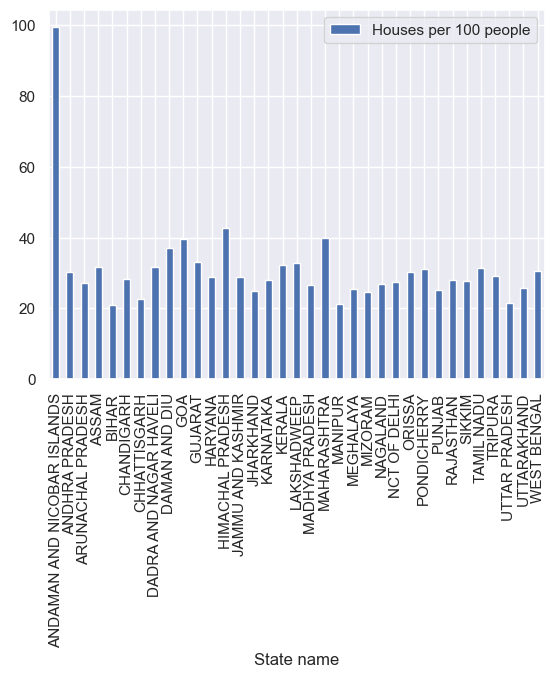

In [14]:
df_statewise_household = pd.DataFrame(df_vis.groupby('State name')['Households'].sum())
df_statewise_population = pd.DataFrame(df_vis.groupby('State name')['Population'].sum())
pd.DataFrame((df_statewise_household['Households']/df_statewise_population['Population'])*100, columns = ['Houses per 100 people']).plot(kind = "bar")

<AxesSubplot:xlabel='State name'>

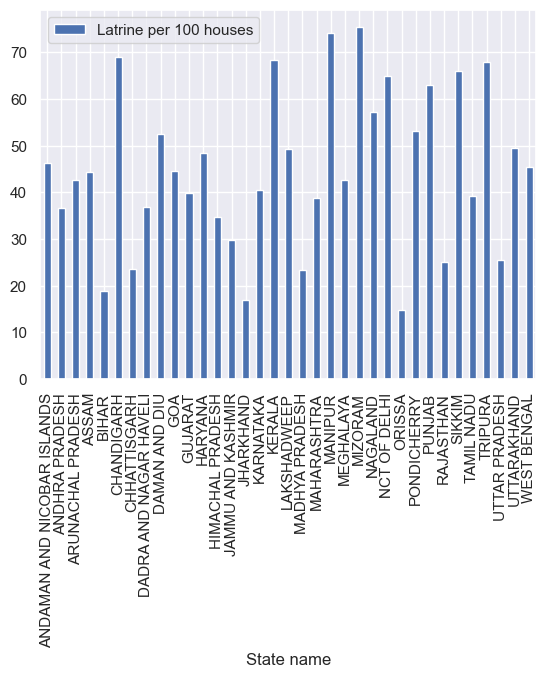

In [15]:
df_latrine = pd.DataFrame(df_vis.groupby('State name')['Having_latrine_facility_within_the_premises_Total_Households'].sum())
pd.DataFrame((df_latrine['Having_latrine_facility_within_the_premises_Total_Households']/df_statewise_household['Households'])*100, columns = ['Latrine per 100 houses']).plot(kind = "bar")

In [16]:
df_census

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
0,1,JAMMU AND KASHMIR,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,1048.0,...,94.0,588.0,71.0,101.0,172.0,74.0,10.0,84.0,15.0,1119.0
1,2,JAMMU AND KASHMIR,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,NaN,...,126.0,562.0,72.0,89.0,161.0,96.0,28.0,124.0,18.0,1066.0
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,488.0,...,46.0,122.0,15.0,22.0,NaN,20.0,NaN,NaN,17.0,242.0
3,4,JAMMU AND KASHMIR,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,18.0,...,27.0,114.0,12.0,18.0,30.0,19.0,3.0,22.0,7.0,214.0
4,5,JAMMU AND KASHMIR,Punch,NaN,251899.0,224936.0,261724.0,163333.0,98391.0,556.0,...,78.0,346.0,35.0,50.0,85.0,59.0,8.0,67.0,12.0,629.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,636,PONDICHERRY,Mahe,41816.0,19143.0,22673.0,36470.0,16610.0,19860.0,144.0,...,2316.0,4309.0,1370.0,838.0,2208.0,576.0,978.0,1554.0,1446.0,10027.0
636,637,PONDICHERRY,Karaikal,200222.0,97809.0,102413.0,154916.0,79903.0,75013.0,35348.0,...,1063.0,2408.0,665.0,340.0,1005.0,246.0,NaN,729.0,341.0,4890.0
637,638,ANDAMAN AND NICOBAR ISLANDS,Nicobars,36842.0,20727.0,NaN,25332.0,15397.0,9935.0,0.0,...,685.0,1895.0,212.0,134.0,346.0,70.0,120.0,190.0,84.0,3151.0
638,639,ANDAMAN AND NICOBAR ISLANDS,North AND Middle Andaman,105597.0,54861.0,50736.0,78683.0,43186.0,35497.0,0.0,...,685.0,1895.0,212.0,NaN,346.0,70.0,120.0,190.0,84.0,3151.0


## Problem Statement 9: (Inconsistency in different datasets)

After the updates, the “Households_Rural” and “Households_Urban” data are redundant in both housing and census data. Compare the two data and see if there is a major difference between the values in the two files. A difference of more than 10% can be considered a major difference. Report the names of the districts where a major difference is found in the data.

### Inconsistency in census data

In [21]:
# checking for rural households
df_census_cleaned = pd.read_csv('C:/Users/raiti/OneDrive/Desktop/Projects/Python Project Healthcare/Python Project - Healthcare Census/Clean_Data/census.csv')
(df_census_cleaned['Households_Rural'].duplicated().sum())/len(df_census_cleaned['Households_Rural'])*100

2.03125

In [22]:
# checking for urban households
(df_census_cleaned['Households_Urban'].duplicated().sum())/len(df_census_cleaned['Households_Urban'])*100

0.78125

In [19]:
df_households

,State Name,District Name,Rural/Urban,Total Number of households,Total Number of Livable,Total Number of Dilapidated,Latrine_premise
0,JAMMU & KASHMIR,Kupwara,Rural,158438.0,92052.478,13150.354,77476.182
1,JAMMU & KASHMIR,Kupwara,Total,181664.0,104093.472,14351.456,92466.976
2,JAMMU & KASHMIR,Kupwara,Urban,0.0,0.000,0.000,0.000
3,JAMMU & KASHMIR,Badgam,Rural,160649.0,74380.487,6265.311,133820.617
4,JAMMU & KASHMIR,Badgam,Total,187839.0,83964.033,7137.882,158348.277
...,...,...,...,...,...,...,...
1903,ANDAMAN & NICOBAR ISLANDS,North & Middle Andaman,Total,0.0,0.000,0.000,0.000
1904,ANDAMAN & NICOBAR ISLANDS,North & Middle Andaman,Urban,0.0,0.000,0.000,0.000
1905,ANDAMAN & NICOBAR ISLANDS,South Andaman,Rural,34901.0,11691.835,1221.535,22580.947
1906,ANDAMAN & NICOBAR ISLANDS,South Andaman,Total,85532.0,22580.448,1881.704,66971.556


In [20]:
df_housing = pd.read_csv("C:/Users/raiti/OneDrive/Desktop/Projects/Python Project Healthcare/Python Project - Healthcare Census/Data/housing.csv")
df_housing

,State Code,State Name,District Code,District Name,Tehsil Code,Tehsil Name,Town Code/Village code,Ward No,Area Name,Rural/Urban,...,Contition_T_Total,Contition_T_Good,Contition_T_Livable,Contition_T_Dilapidated,Contition_R_Total,Residence_Good,Residence_Livable,Residence_Dilapidated,Residence_cum_other,Residence_cum_Good
0,1,JAMMU & KASHMIR,1,Kupwara,0,Kupwara,0,0,District - Kupwara,Rural,...,100,33.6,58.1,8.3,90.9,32.7,51.0,7.2,9.1,1.0
1,1,JAMMU & KASHMIR,1,Kupwara,0,Kupwara,0,0,District - Kupwara,Total,...,100,34.8,57.3,7.9,91.0,33.8,50.2,6.9,9.0,0.9
2,1,JAMMU & KASHMIR,1,Kupwara,0,Kupwara,0,0,District - Kupwara,Urban,...,100,45.7,49.5,4.8,91.8,45.0,42.2,4.5,8.2,0.7
3,1,JAMMU & KASHMIR,2,Badgam,0,Badgam,0,0,District - Badgam,Rural,...,100,49.7,46.3,3.9,97.2,49.0,44.5,3.7,2.8,0.7
4,1,JAMMU & KASHMIR,2,Badgam,0,Badgam,0,0,District - Badgam,Total,...,100,51.6,44.7,3.8,97.3,50.8,43.0,3.5,2.7,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1903,35,ANDAMAN & NICOBAR ISLANDS,639,North & Middle Andaman,0,North & Middle Andaman,0,0,District - North & Middle Andaman,Total,...,100,52.6,44.6,2.8,97.5,51.2,43.5,2.8,2.5,1.4
1904,35,ANDAMAN & NICOBAR ISLANDS,639,North & Middle Andaman,0,North & Middle Andaman,0,0,District - North & Middle Andaman,Urban,...,100,37.5,55.9,6.6,95.8,36.3,53.0,6.5,4.2,1.2
1905,35,ANDAMAN & NICOBAR ISLANDS,640,South Andaman,0,South Andaman,0,0,District - South Andaman,Rural,...,100,63.0,33.5,3.5,98.3,62.0,32.8,3.5,1.7,1.0
1906,35,ANDAMAN & NICOBAR ISLANDS,640,South Andaman,0,South Andaman,0,0,District - South Andaman,Total,...,100,71.5,26.4,2.2,98.5,70.6,25.8,2.1,1.5,0.9
